# Projeto 3 - Predição de varíavel quantitativa

----
## Introdução

Quando se trata de viagens, seja a passeio ou a trabalho, um cronograma pré-determinado é essencial para a organização da viagem. Entretanto, por mais que um cronograma seja montado pensando nas mais diversas variáveis, o atraso de voos nos aeroportos tende a pegar os viajantes de surpresa, sendo um dos mais frequentes fatores de alteração no cronograma dos viajantes. 

Pensando nisso, o objetivo deste projeto é criar um **modelo de predição de atrasos de voos domésticos nos EUA**, utilizando um dataset que contém informações de todos os voos domésticos ocorridos em 2023. Visando aumentar o desempenho do modelo, escolhemos prever o atraso dos voos apenas do **aeroporto de Atlanta**, de onde sairam a maior quantidade de voos em 2023. A variável principal (target), portanto, é o atraso de partida do voo em minutos.

O modelo será desenvolvido com o intuito de fornecer insights e previsões precisas sobre os atrasos de voos, auxiliando na tomada de decisões e no planejamento de viagens aéreas. Para isso, o projeto foi dividido em algumas etapas, sendo elas:

1) Descrição do dataset 
2) Importação e tratamento do dataset
3) Análise exploratória dos dados
5) Construção do modelo de predição
6) Avaliação do modelo
7) Conclusão
8) Bibliografia


----
## 1) Descrição do dataset

### Limpeza

Os dados utilizados neste projeto foram obtidos na plataforma Kaggle e contém informações sobre todos os voos domésticos ocorridos nos EUA em 2023. O dataset é composto por 6.743.404 linhas e 24 colunas, sendo que cada linha representa um voo e cada coluna representa uma variável.

Devido ao tamanho do dataset, foi necessário realizar um pré-processamento dos dados para que fosse possível realizar a análise exploratória e a construção do modelo de predição. O pré-processamento consistiu nas seguintes etapas:

1) Filtragem do dataset para conter apenas os voos que partiram de Atlanta;
2) Análise das variáveis e remoção das colunas que não seriam utilizadas no modelo, sendo elas²:
    1) Descrição do avião (detalhes técnicos do modelo dos aviões);
    2) Nome das cidades de partida e chegada (código do aeroporto é mais relevante e o ponto de partida sempre será o aeroporto de Atlanta);
    3) Duração do voo (a duração exata do voo gera uma informação pouco relevante, sendo mais eficiente análisar o tipo da duração do voo);
3) Alterar a variável da data completa dos voos para apenas o mês dos voos, facilitando a generalização do modelo.  

### Descrição de variáveis

| Atributos | Descrição | Possíveis Valores |
|------|------|------|
|   Month  | Mês em que os voos foram realizados | 1 a 12 |
|   Day_Of_Week  | Dia da semana em que os voos foram realizados | 1 a 7 |
|   Airline  | Nome da companhia aérea | Southwest Airlines Co., Delta Air Lines Inc, American Airlines Inc., United Air Lines Inc., Skywest Airlines Inc., Republic Airways, JetBlue Airways, Spirit Air Lines, Alaska Airlines Inc., American Eagle Airlines Inc., Endeavor Air, PSA Airlines, Frontier Airlines Inc., Allegiant Air, Hawaiian Airlines Inc.
|   DepTime_label  | Período de partida dos voos | Morning, Afternon, Evening, Night |
|   Dep_Delay_Tag  | Tag de atraso na partida dos voos | 0: Sem atraso ou atrasos menores que 5 minutos; 1: Atrasos maiores que 5 minutos |
|   Dep_Delay_Type  | Tipo de atraso na partida dos voos | Low <5min, Medium >15min, Hight >60min |
|   Distance_type  | Tipo de voo baseado na distância | Short Haul < 1500Mi, Medium Haul < 3000Mi, Long Haul < 6000Mi |
|   tavg    | Temperatura média no dia | Graus celsius |
|	prcp    | Precipitação no dia | Milímetros |
|	wspd    | Velocidade do vento no momento da partida | Nós |

- **Target**: Prever o valor da variável **Dep_Delay** (tempo de atraso da partida do voo) é o principal objetivo do modelo, sendo portanto a o target.
- **Features**: A partir da análise exploratória, será demonstrada a relevância de cada uma
    - **Month**: Diferentes períodos do ano têm influência na quantidade e duração de atrasos em voos.
    - **Day_Of_Week**: Diferentes dias da semana têm influência na quantidade e duração de atrasos em voos.
    - **Airline**: Diferentes companhias aéreas têm maior tendência a cometerem atrasos, devido à organização da operação.
    - **DepTime_label**: Em cada período do dia, a operação sofre mudanças, o que pode causar atrasos.
    - **Dep_Delay_Type**: Classificação relativa ao tempo de atraso.
    - **Distance_Type**: Os preparativos para um voo dependem principalmente de sua duração. Tais preparativos podem ocasionar em atrasos na partida.
    - **Variáveis climáticas**: Condições climáticas (Temperatura média, precipitação e velocidade do vento) podem causar atrasos.

----
## 2) Importação e tratamento do dataset
Nesta seção será implementada a preparação proposta no item 1.

In [42]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
import statsmodels.api as sm

In [43]:
# Leitura do dataset
dados = pd.read_csv('US_flights_2023.csv')
dados_clima = pd.read_csv('weather_meteo_by_airport.csv')


### Limpeza e pré-processamento de dados

In [44]:
# Obtendo os dados do aerorpot de Atlanta (ATL)
dados = dados.loc[dados.Dep_Airport == 'ATL', :]
dados_clima = dados_clima.loc[dados_clima['airport_id'] == 'ATL', :]

# Verificando os dados
display(dados.columns, dados.shape, dados.dtypes)
display(dados_clima.columns, dados_clima.shape, dados_clima.dtypes)

Index(['FlightDate', 'Day_Of_Week', 'Airline', 'Tail_Number', 'Dep_Airport',
       'Dep_CityName', 'DepTime_label', 'Dep_Delay', 'Dep_Delay_Tag',
       'Dep_Delay_Type', 'Arr_Airport', 'Arr_CityName', 'Arr_Delay',
       'Arr_Delay_Type', 'Flight_Duration', 'Distance_type', 'Delay_Carrier',
       'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft',
       'Manufacturer', 'Model', 'Aicraft_age'],
      dtype='object')

(332935, 24)

FlightDate            object
Day_Of_Week            int64
Airline               object
Tail_Number           object
Dep_Airport           object
Dep_CityName          object
DepTime_label         object
Dep_Delay              int64
Dep_Delay_Tag          int64
Dep_Delay_Type        object
Arr_Airport           object
Arr_CityName          object
Arr_Delay              int64
Arr_Delay_Type        object
Flight_Duration        int64
Distance_type         object
Delay_Carrier          int64
Delay_Weather          int64
Delay_NAS              int64
Delay_Security         int64
Delay_LastAircraft     int64
Manufacturer          object
Model                 object
Aicraft_age            int64
dtype: object

Index(['time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres',
       'airport_id'],
      dtype='object')

(365, 10)

time           object
tavg          float64
tmin          float64
tmax          float64
prcp          float64
snow          float64
wdir          float64
wspd          float64
pres          float64
airport_id     object
dtype: object

In [45]:
dados_clima_subset = dados_clima[['time', 'tavg', 'prcp', 'wspd']]

# Realiza o merge com a subset dos dados_clima
dados = dados.merge(dados_clima_subset, left_on='FlightDate', right_on='time', how='left')

# Remove a coluna 'time' resultante da mesclagem
dados.drop('time', axis=1, inplace=True)

In [46]:
# Descartando colunas que não serão utilizadas
columns_to_drop = ['Tail_Number', 'Dep_CityName', 'Dep_Delay_Tag', 'Arr_Airport', 'Arr_CityName','Arr_Delay_Type', 'Flight_Duration', 'Manufacturer', 'Model', 'Aicraft_age', 'Dep_Airport']

for column in columns_to_drop:
    dados = dados.drop(column, axis=1)

In [47]:
dados.head(5)

,FlightDate,Day_Of_Week,Airline,DepTime_label,Dep_Delay,Dep_Delay_Type,Arr_Delay,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,tavg,prcp,wspd
0,2023-01-09,1,Endeavor Air,Afternoon,-3,Low <5min,-12,Short Haul >1500Mi,0,0,0,0,0,8.0,0.0,9.3
1,2023-01-10,2,Endeavor Air,Afternoon,-5,Low <5min,-12,Short Haul >1500Mi,0,0,0,0,0,7.3,0.0,2.7
2,2023-01-11,3,Endeavor Air,Afternoon,-2,Low <5min,-7,Short Haul >1500Mi,0,0,0,0,0,11.0,0.0,3.2
3,2023-01-12,4,Endeavor Air,Afternoon,16,Medium >15min,11,Short Haul >1500Mi,0,0,0,0,0,15.5,20.1,11.7
4,2023-01-13,5,Endeavor Air,Afternoon,-3,Low <5min,-8,Short Haul >1500Mi,0,0,0,0,0,5.7,0.3,19.8


In [48]:
# Adaptando as colunas para o tipo correto
dados.Day_Of_Week = dados.Day_Of_Week.astype('category')

dados.Dep_Delay_Type = dados.Dep_Delay_Type.astype('category') # Tipo do atraso na partida
dados['Dep_Delay_Type'] = pd.Categorical(dados['Dep_Delay_Type'], categories=['Low <5min', 'Medium >15min', 'Hight >60min'], ordered=True)

dados.Distance_type = dados.Distance_type.astype('category') # Tipo da distância
dados['Distance_type'] = pd.Categorical(dados['Distance_type'], categories=['Short Haul >1500Mi', 'Medium Haul <3000Mi', 'Long Haul <6000Mi'], ordered=True)

# Substituindo a data do voo pelo mês
dados['FlightDate'] = pd.to_datetime(dados['FlightDate']).dt.month
dados.rename(columns={'FlightDate': 'Month'}, inplace=True)

# Adicionando a coluna de atraso total
dados['Total_Delay'] = dados['Dep_Delay'] + dados['Arr_Delay']


# Verificando os dados
display(dados.head(5))
display(dados.columns)
display(dados.shape)

,Month,Day_Of_Week,Airline,DepTime_label,Dep_Delay,Dep_Delay_Type,Arr_Delay,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,tavg,prcp,wspd,Total_Delay
0,1,1,Endeavor Air,Afternoon,-3,Low <5min,-12,Short Haul >1500Mi,0,0,0,0,0,8.0,0.0,9.3,-15
1,1,2,Endeavor Air,Afternoon,-5,Low <5min,-12,Short Haul >1500Mi,0,0,0,0,0,7.3,0.0,2.7,-17
2,1,3,Endeavor Air,Afternoon,-2,Low <5min,-7,Short Haul >1500Mi,0,0,0,0,0,11.0,0.0,3.2,-9
3,1,4,Endeavor Air,Afternoon,16,Medium >15min,11,Short Haul >1500Mi,0,0,0,0,0,15.5,20.1,11.7,27
4,1,5,Endeavor Air,Afternoon,-3,Low <5min,-8,Short Haul >1500Mi,0,0,0,0,0,5.7,0.3,19.8,-11


Index(['Month', 'Day_Of_Week', 'Airline', 'DepTime_label', 'Dep_Delay',
       'Dep_Delay_Type', 'Arr_Delay', 'Distance_type', 'Delay_Carrier',
       'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft',
       'tavg', 'prcp', 'wspd', 'Total_Delay'],
      dtype='object')

(332935, 17)

In [49]:
dados.dtypes

Month                    int32
Day_Of_Week           category
Airline                 object
DepTime_label           object
Dep_Delay                int64
Dep_Delay_Type        category
Arr_Delay                int64
Distance_type         category
Delay_Carrier            int64
Delay_Weather            int64
Delay_NAS                int64
Delay_Security           int64
Delay_LastAircraft       int64
tavg                   float64
prcp                   float64
wspd                   float64
Total_Delay              int64
dtype: object

----
## 3) Análise exploratória dos dados

### 3.1) Análise univariada

#### Análise univariada qualitiva
Distribuição das varíaveis qualitativas no dataset

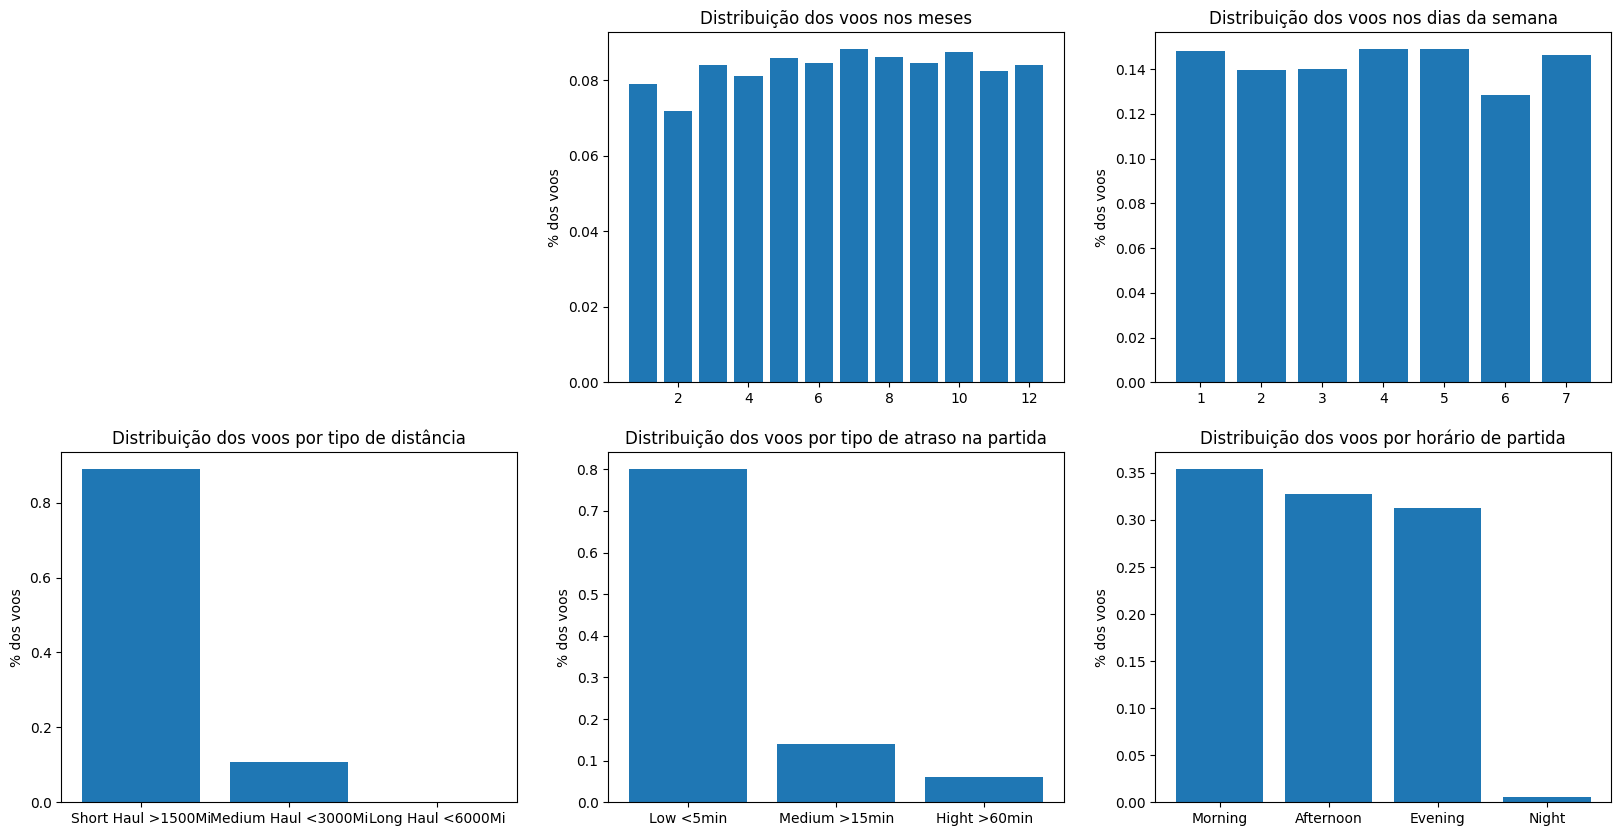

In [9]:
contagem = {}
for column in dados.columns:
    if dados[column].dtype.name != 'int64':
        contagem[column] = dados[column].value_counts(True)

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 2)
plt.bar(contagem['Month'].index, contagem['Month'].values)
plt.ylabel('% dos voos')
plt.title('Distribuição dos voos nos meses')

plt.subplot(2, 3, 3)
plt.bar(contagem['Day_Of_Week'].index, contagem['Day_Of_Week'].values)
plt.ylabel('% dos voos')
plt.title('Distribuição dos voos nos dias da semana')

plt.subplot(2, 3, 4)
plt.bar(contagem['Distance_type'].index, contagem['Distance_type'].values)
plt.ylabel('% dos voos')
plt.title('Distribuição dos voos por tipo de distância')

plt.subplot(2, 3, 5)
plt.bar(contagem['Dep_Delay_Type'].index, contagem['Dep_Delay_Type'].values)
plt.ylabel('% dos voos')
plt.title('Distribuição dos voos por tipo de atraso na partida')

plt.subplot(2, 3, 6)
plt.bar(contagem['DepTime_label'].index, contagem['DepTime_label'].values)
plt.ylabel('% dos voos')
plt.title('Distribuição dos voos por horário de partida')

plt.show()


- **Companhias áereas**: Há claramente um domínio de mercado pela companhia Delta Airlines.
- **Análise temporal**: Durante a semana, observa-se pouca variação entre a quantidade de voos. Da mesma forma, durante o ano, só se nota uma alteração sutíl no mês de julho, o que pode ser explicado pelas férias que geralmente ocorrem nesse período. Por outra lado, analisando os horários dos voos, observa-se preferência grande por voos não noturnos.
- **Distância**: A maioria dos voos constituem trajetos curtos (<1500 milhas) ou médios (<3000 milhas). Uma parte pequena é composta por voos longos, o que pode ser explicado pelo fato de se tratarem de voos domésticos.
- **Frequência dos atrasos**: Em aproxidamente 80% dos casos, não ocorrem atrasos significativos (<5 min) no aeroporto de Atlanta. Quando ocorrem, entretanto, é mais provavél encontrar um atraso médio.

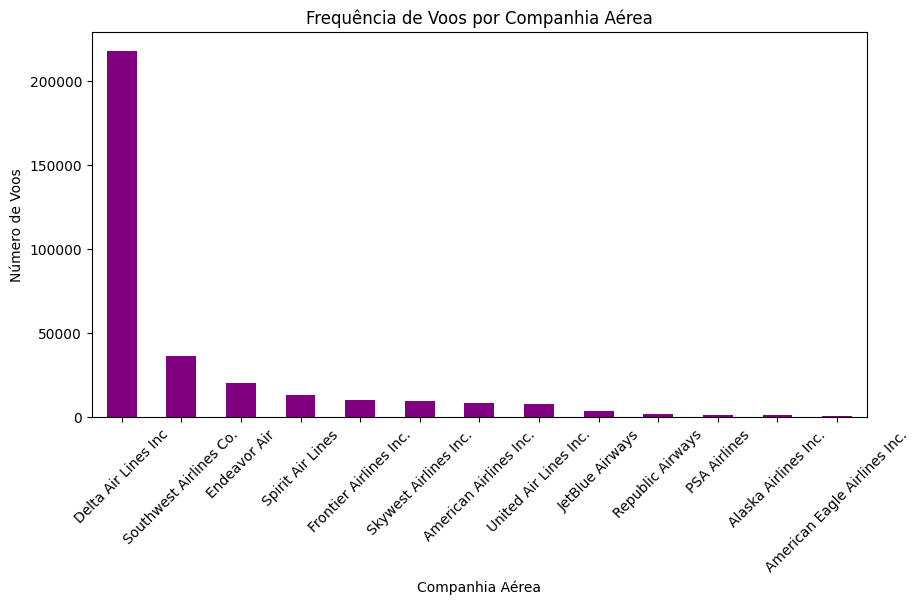

In [10]:
plt.figure(figsize=(10, 5))
dados['Airline'].value_counts().plot(kind='bar', color='purple')
plt.title('Frequência de Voos por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Número de Voos')
plt.xticks(rotation=45)
plt.show()

Há claramente uma dominância de mercado da Delta Airlines.

#### Análise univariada quantitativa
Análise individual de variáveis quantitativas

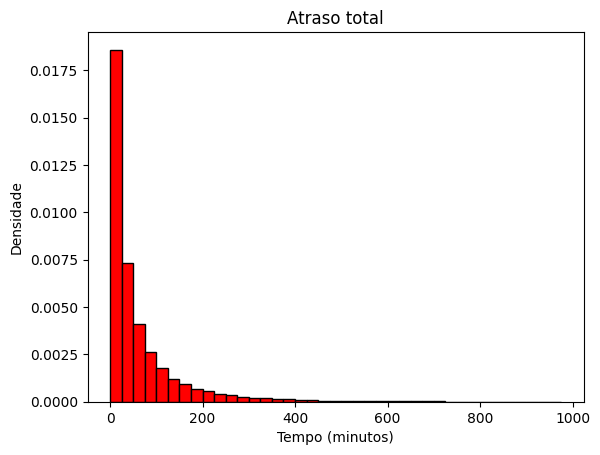

In [11]:
faixa = np.arange(0, 1000, 25)

plt.hist(dados['Total_Delay'].dropna(), bins=faixa, color='red', edgecolor='black', density=True)
plt.title('Atraso total')
plt.xlabel('Tempo (minutos)')
plt.ylabel('Densidade')
plt.show()

- De maneira geral, o atraso total dificilmente será maior que 200 minutos. 

#### Componentes do atraso

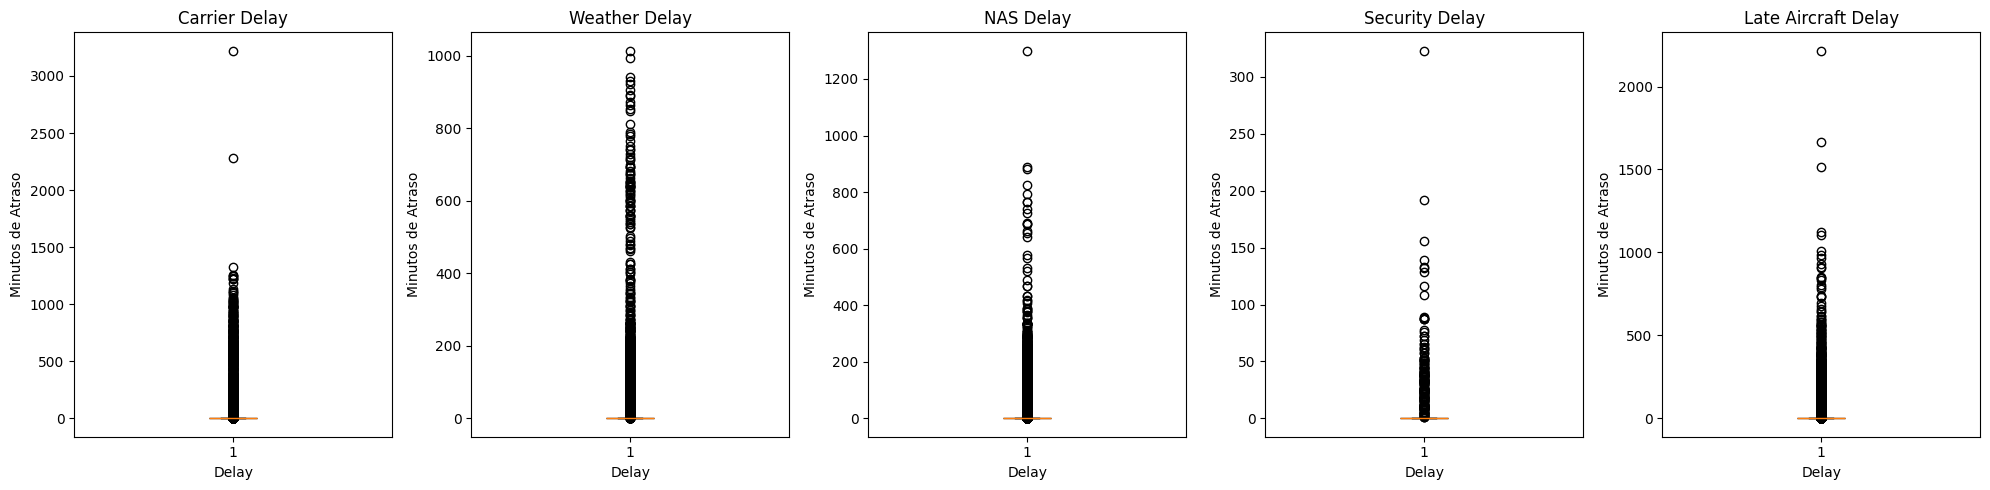

In [12]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
delay_types = ['Delay_Carrier', 'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft']
delay_titles = ['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay']
for i, delay in enumerate(delay_types):
    ax[i].boxplot(dados[delay].dropna(), patch_artist=True)
    ax[i].set_title(delay_titles[i])
    ax[i].set_xlabel('Delay')
    ax[i].set_ylabel('Minutos de Atraso')
plt.tight_layout()
plt.show()

- Para todos as componentes do atraso de partida, observa-se a mesma tendência: a grande maioria tem o valor 0, visto que a maioria dos voos não têm atraso. 
- Entre os voos atrasados:
    - **Carrier Delay**: Varia entre 0 e aprox. 1200. Valores acima configuram outliers
    - **Weather Delay**: Somente valores acima de 800 configuram outliers, tendo uma distribuição mais homogênea.
    - **NAS Delay**: Varia entre 0 e 400. Valores acima configuram outliers
    - **Security Delay**: Sendo o menos frequente e menos significativo, varia entre 0 e aprox. 80. Valores acima configuram outliers.
    - **Late Aircraft Delay**: Varia de 0 e 800. Valores acima configuram outliers.

### 3.2) Análise multivariada

#### Correlação entre as componentes e o tempo total de atraso de um voo

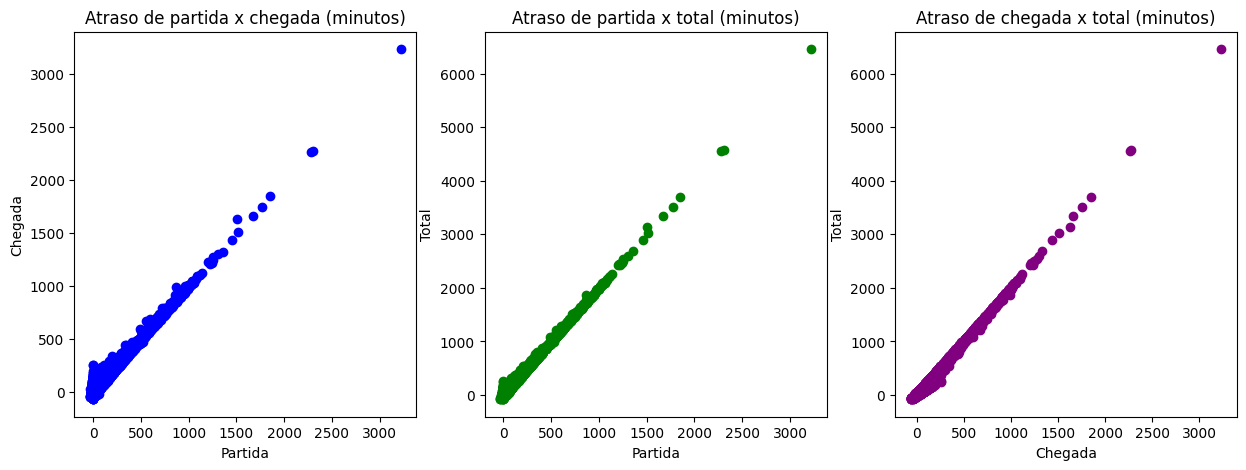

Correlação linear entre partida e chegada: 0.966853298475312
Correlação linear entre partida e total: 0.9913137497116205
Correlação linear entre chegada e total: 0.9920358553844639


In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(dados['Dep_Delay'], dados['Arr_Delay'], color='blue')
plt.title('Atraso de partida x chegada (minutos)')
plt.xlabel('Partida')
plt.ylabel('Chegada')

plt.subplot(1, 3, 2)
plt.scatter(dados['Dep_Delay'], dados['Total_Delay'], color='green')
plt.title('Atraso de partida x total (minutos)')
plt.xlabel('Partida')
plt.ylabel('Total')

plt.subplot(1, 3, 3)
plt.scatter(dados['Arr_Delay'], dados['Total_Delay'], color='purple')
plt.title('Atraso de chegada x total (minutos)')
plt.xlabel('Chegada')
plt.ylabel('Total')

plt.show()

print('Correlação linear entre partida e chegada:', dados['Dep_Delay'].corr(dados['Arr_Delay']))
print('Correlação linear entre partida e total:', dados['Dep_Delay'].corr(dados['Total_Delay']))
print('Correlação linear entre chegada e total:', dados['Arr_Delay'].corr(dados['Total_Delay']))

- O atraso na partida está fortemente relacionado ao atraso na chegada (visto pelo coeficiente de correlação linear), indicando que o atraso se propaga durante o processo. da mesma forma, o atraso na partida e na chegada estão fortemente relacionados com atraso total, analisando individualmente.

#### Análise do atraso de acordo com a companhia aérea e o dia da semana

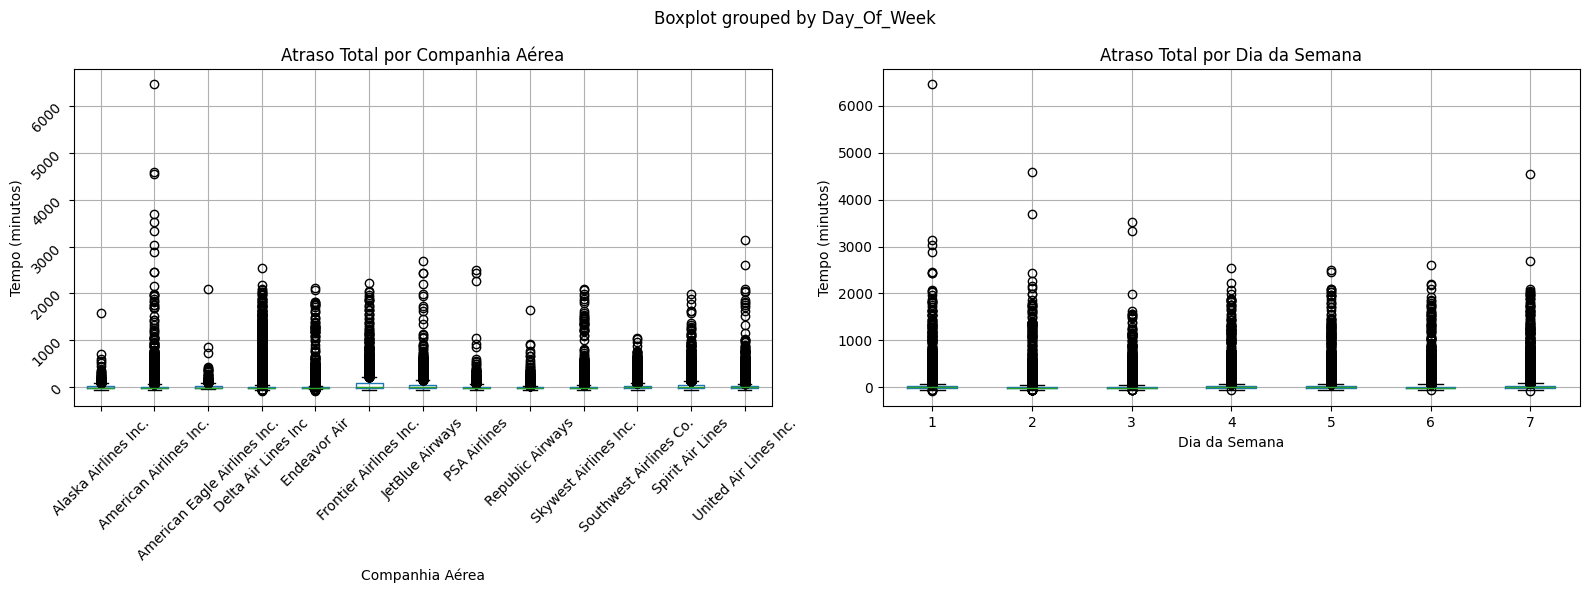

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

dados.loc[dados.Dep_Delay_Type != 0, :].boxplot(column='Total_Delay', by='Airline', ax=ax[0])
ax[0].set_title('Atraso Total por Companhia Aérea')
ax[0].set_xlabel('Companhia Aérea')
ax[0].set_ylabel('Tempo (minutos)')
ax[0].tick_params(labelrotation=45)

dados.loc[dados.Dep_Delay_Type != 0, :].boxplot(column='Total_Delay', by='Day_Of_Week', ax=ax[1])
ax[1].set_title('Atraso Total por Dia da Semana')
ax[1].set_xlabel('Dia da Semana')
ax[1].set_ylabel('Tempo (minutos)')

plt.tight_layout()
plt.show()

- **Companhias Aéreas**: A maior companhia do segmento é a que apresenta não só mais atrasos como também o maior intervalo de atrasos, desconsiderando outliers. Isso pode indicar que a companhia tem problemas em atender à demanda de voos domésticos.
- **Dias da Semana**: Com exceção do terceiro dia da semana, que apresenta uma faixa de atraso sutilmente menor que os outros dias, não parece haver uma tendência específica relacionada ao dia da semana que o voo ocorre.

#### Análise temporal

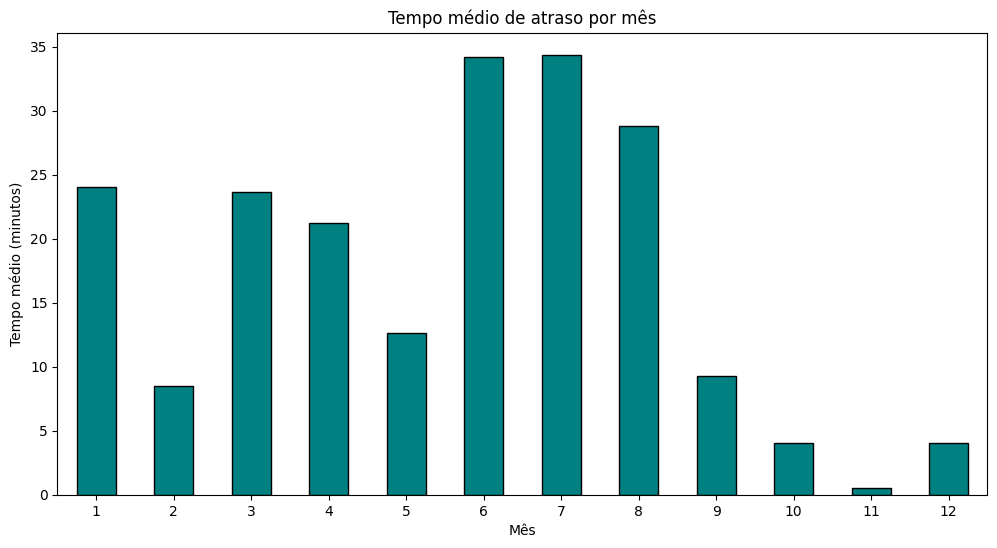

In [15]:
plt.figure(figsize=(12, 6))
monthly_delays = dados.groupby('Month')['Total_Delay'].mean()
monthly_delays.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Tempo médio de atraso por mês')
plt.xlabel('Mês')
plt.ylabel('Tempo médio (minutos)')
plt.xticks(rotation=0)
plt.show()

- O mês de julho é o mês com maior atraso médio. Isso é um indicador importante, dado que a diferença no volume de voos, como foi analisado anteriormente, não se comporta da mesma forma que a diferença no atraso total entre os meses (observe julho e novembro, por exemplo). Por outro lado, a provavel explicação é o maior volume de voos nesse período de férias.

C:\Users\othom\AppData\Local\Temp\ipykernel_22632\1778306188.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_delays = dados.groupby('Day_Of_Week')['Total_Delay'].mean()


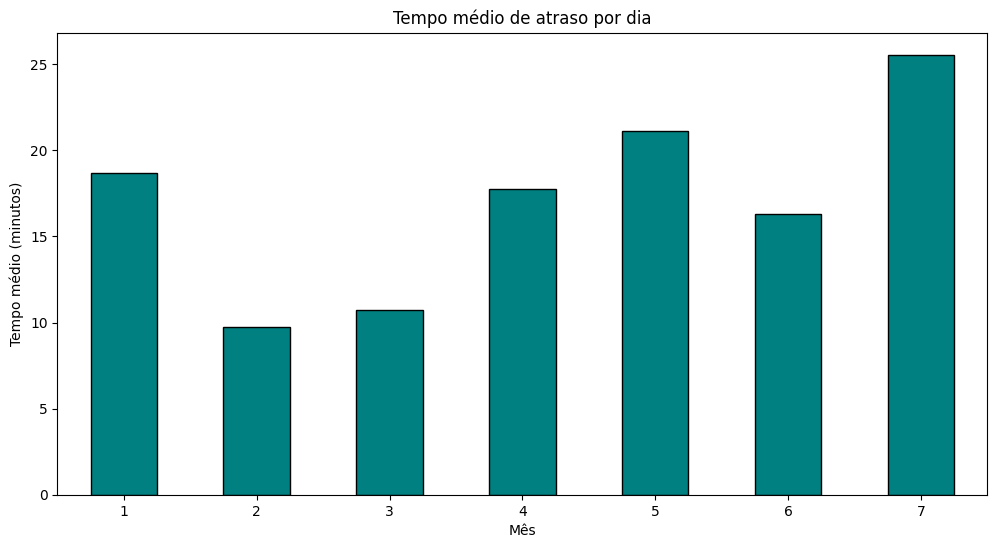

In [16]:
plt.figure(figsize=(12, 6))
monthly_delays = dados.groupby('Day_Of_Week')['Total_Delay'].mean()
monthly_delays.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Tempo médio de atraso por dia')
plt.xlabel('Mês')
plt.ylabel('Tempo médio (minutos)')
plt.xticks(rotation=0)
plt.show()

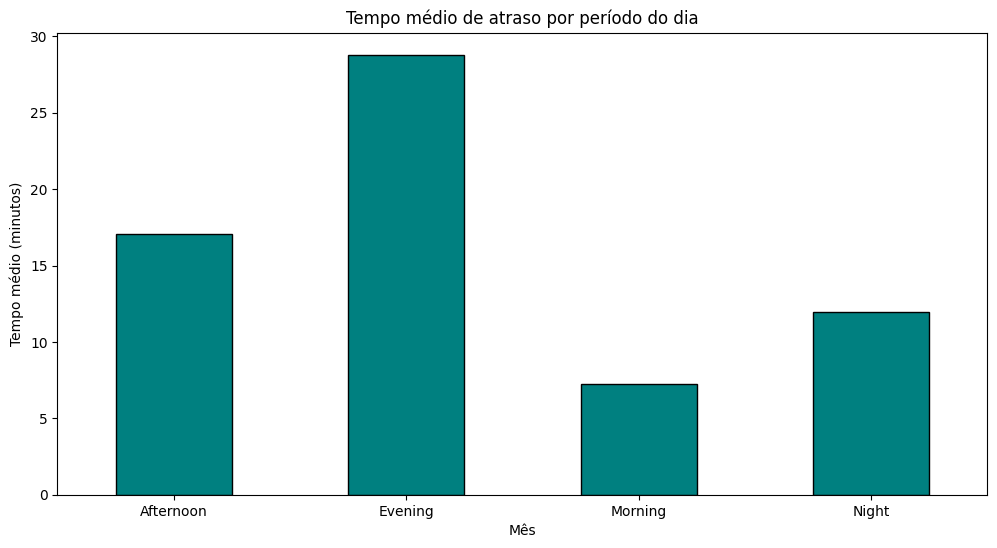

In [17]:
plt.figure(figsize=(12, 6))
monthly_delays = dados.groupby('DepTime_label')['Total_Delay'].mean()
monthly_delays.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Tempo médio de atraso por período do dia')
plt.xlabel('Mês')
plt.ylabel('Tempo médio (minutos)')
plt.xticks(rotation=0)
plt.show()

### Conclusão
Como foi constatado, a relação entre as componentes do atraso indica que estas estão completamente relacionadas. Dessa forma, é plausível se desfazer das componentes, tratando apenas a variável target (atraso de partida).

In [50]:
dados = dados.drop(['Arr_Delay', 'Total_Delay', 'Delay_Carrier', 'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft'], axis=1)
dados.head()

,Month,Day_Of_Week,Airline,DepTime_label,Dep_Delay,Dep_Delay_Type,Distance_type,tavg,prcp,wspd
0,1,1,Endeavor Air,Afternoon,-3,Low <5min,Short Haul >1500Mi,8.0,0.0,9.3
1,1,2,Endeavor Air,Afternoon,-5,Low <5min,Short Haul >1500Mi,7.3,0.0,2.7
2,1,3,Endeavor Air,Afternoon,-2,Low <5min,Short Haul >1500Mi,11.0,0.0,3.2
3,1,4,Endeavor Air,Afternoon,16,Medium >15min,Short Haul >1500Mi,15.5,20.1,11.7
4,1,5,Endeavor Air,Afternoon,-3,Low <5min,Short Haul >1500Mi,5.7,0.3,19.8


---- 
## Modelagem

In [59]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

#### Criação de dummies

In [52]:
dummies = pd.get_dummies(dados['Dep_Delay_Type'], prefix='Dep_Delay_Type', drop_first=True, dtype='int64')
dados = pd.concat([dados, dummies], axis=1)

dummies = pd.get_dummies(dados['Distance_type'], prefix='Distance_type', drop_first=True, dtype='int64')
dados = pd.concat([dados, dummies], axis=1)

dummies = pd.get_dummies(dados['Day_Of_Week'], prefix='Day_Of_Week', drop_first=True, dtype='int64')
dados = pd.concat([dados, dummies], axis=1)

dummies = pd.get_dummies(dados['DepTime_label'], prefix='DepTime_label', drop_first=True, dtype='int64')
dados = pd.concat([dados, dummies], axis=1)

dummies = pd.get_dummies(dados['Airline'], prefix='Airline', drop_first=True, dtype='int64')
dados = pd.concat([dados, dummies], axis=1)

dummies = pd.get_dummies(dados['Month'], prefix='Month', drop_first=True, dtype='int64')
dados = pd.concat([dados, dummies], axis=1)

In [53]:
dados_quant = dados.select_dtypes(include=['float64', 'int64'])
dados_quant.head(5)

,Dep_Delay,tavg,prcp,wspd,Dep_Delay_Type_Medium >15min,Dep_Delay_Type_Hight >60min,Distance_type_Medium Haul <3000Mi,Distance_type_Long Haul <6000Mi,Day_Of_Week_2,Day_Of_Week_3,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,-3,8.0,0.0,9.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5,7.3,0.0,2.7,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-2,11.0,0.0,3.2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,16,15.5,20.1,11.7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-3,5.7,0.3,19.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X = dados_quant.drop(['Dep_Delay', 'Day_Of_Week_4', 'Day_Of_Week_5', 'wspd', 'DepTime_label_Morning', 'DepTime_label_Night', 'Airline_Republic Airways', 'Month_8'], axis=1)
Y = dados_quant['Dep_Delay']

results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Dep_Delay   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                 1.287e+04
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        11:15:32   Log-Likelihood:            -1.5962e+06
No. Observations:              332935   AIC:                         3.192e+06
Df Residuals:                  332902   BIC:                         3.193e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.9738      0.565     -7.036      0.000      -5.081      -2.867
tavg                                     0.0488      0.011      4.587      0.000       0.028       0.070
prcp                                     0.0865      0.007     12.984      0.000       0.073       0.100
Dep_Delay_Type_Medium >15min            32.0688      0.150    213.248      0.000      31.774      32.364
Dep_Delay_Type_Hight >60min            131.7183      0.221    597.144      0.000     131.286     132.151
Distance_type_Medium Haul <3000Mi        0.8306      0.166      5.013      0.000       0.506       1.155
Distance_type_Long Haul <6000Mi          2.5070      1.250      2.005      0.045       0.057       4.957
Day_Of_Week_2                           -0.6979      0.156     -4.481      0.000      -1.003      -0.393
Day_Of_Week_3                           -0.8227      0.155     -5.291      0.000      -1.127      -0.518
Day_Of_Week_6                           -0.3401      0.161     -2.113      0.035      -0.656      -0.025
Day_Of_Week_7                            0.3921      0.154      2.553      0.011       0.091       0.693
DepTime_label_Evening                    1.0814      0.111      9.774      0.000       0.865       1.298
Airline_American Airlines Inc.           5.4527      0.601      9.069      0.000       4.274       6.631
Airline_American Eagle Airlines Inc.     3.2743      1.413      2.318      0.020       0.506       6.043
Airline_Delta Air Lines Inc              2.2007      0.514      4.278      0.000       1.192       3.209
Airline_Endeavor Air                     1.3476      0.552      2.442      0.015       0.266       2.429
Airline_Frontier Airlines Inc.           5.1460      0.588      8.755      0.000       3.994       6.298
Airline_JetBlue Airways                  6.9494      0.713      9.750      0.000       5.552       8.346
Airline_PSA Airlines                     2.5231      0.981      2.573      0.010       0.601       4.445
Airline_Skywest Airlines Inc.            3.0508      0.592      5.149      0.000       1.890       4.212
Airline_Southwest Airlines Co.           2.8377      0.535      5.307      0.000       1.790       3.886
Airline_Spirit Air Lines                 4.3824      0.570      7.693      0.000       3.266       5.499
Airline_United Air Lines Inc.            4.7078      0.607      7.750      0.000       3.517       5.898
Month_2                                 -0.9871      0.234     -4.211      0.000      -1.447      -0.528
Month_3                                 -0.9515      0.221     -4.297      0.000      -1.385      -0.517
Month_4                                 -0.9181      0.218     -4.208      0.000      -1.346      -0.490
Month_5                               

In [55]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [65]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, Y_train)

y_reg = reg_model.predict(X_test)
x_reg = reg_model.predict(X_train)

reg_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_reg})

print(f'R^2: {metrics.r2_score(Y_test, y_reg)}\n'
      f'Erro médio: {metrics.root_mean_squared_error(Y_test, y_reg)}\n')      
reg_model_diff

R^2: 0.5420676714155532
Erro médio: 30.032403789832113



,Actual value,Predicted value
284810,34,28.873770
207475,33,31.846907
213221,52,32.921180
280247,4,1.998600
258683,-4,-1.032163
...,...,...
113877,-3,1.308721
230053,-3,-0.612422
72827,4,-0.199974
228948,3,-1.534949


In [76]:
rfr_model = RandomForestRegressor(n_estimators=100)
rfr_model.fit(X_train, Y_train)

y_rfr = rfr_model.predict(X_test)
x_rfr = rfr_model.predict(X_train)

rfr_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_rfr})

In [77]:
print(f'R^2: {metrics.r2_score(Y_test, y_rfr)}\n'
      f'Erro médio: {metrics.root_mean_squared_error(Y_test, y_rfr)}')

R^2: 0.49971045679611925
Erro médio: 31.39063889733734


In [39]:
cbr_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE')
cbr_model = cbr_model.fit(X_train, Y_train)

x_cbr = cbr_model.predict(X_train)
y_cbr = cbr_model.predict(X_test)

cbr_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_cbr})

0:	learn: 41.4510258	total: 10.7ms	remaining: 10.7s
1:	learn: 39.3965413	total: 23.8ms	remaining: 11.9s
2:	learn: 37.6867282	total: 35.5ms	remaining: 11.8s
3:	learn: 36.2005278	total: 48.8ms	remaining: 12.1s
4:	learn: 34.9491676	total: 63.6ms	remaining: 12.7s
5:	learn: 33.9290172	total: 77.6ms	remaining: 12.9s
6:	learn: 33.0510063	total: 90.9ms	remaining: 12.9s
7:	learn: 32.3477447	total: 99.5ms	remaining: 12.3s
8:	learn: 31.7267121	total: 114ms	remaining: 12.5s
9:	learn: 31.2104026	total: 128ms	remaining: 12.7s
10:	learn: 30.7731577	total: 142ms	remaining: 12.7s
11:	learn: 30.4256657	total: 156ms	remaining: 12.9s
12:	learn: 30.1323580	total: 169ms	remaining: 12.8s
13:	learn: 29.8933822	total: 182ms	remaining: 12.8s
14:	learn: 29.6897266	total: 196ms	remaining: 12.8s
15:	learn: 29.5241071	total: 212ms	remaining: 13s
16:	learn: 29.3669013	total: 227ms	remaining: 13.1s
17:	learn: 29.2554221	total: 260ms	remaining: 14.2s
18:	learn: 29.1560117	total: 278ms	remaining: 14.3s
19:	learn: 29.06

In [40]:
print(f'R^2: {metrics.r2_score(Y_test, y_cbr)}\n'
      f'Erro médio: {metrics.root_mean_squared_error(Y_test, y_cbr)}')

R^2: 0.5110876296688744
Erro médio: 30.44437640389486


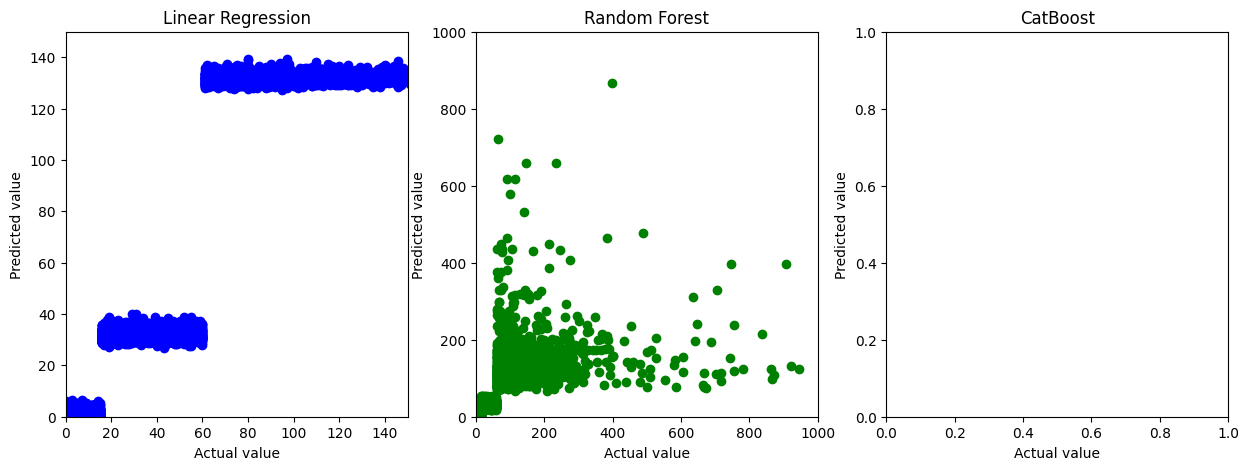

In [78]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(Y_test, y_reg, 'o', color='blue')
plt.xlim(0, 150)
plt.ylim(0, 150)
plt.title('Linear Regression')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

plt.subplot(1, 3, 2)
plt.plot(Y_test, y_rfr, 'o', color='green')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('Random Forest')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

plt.subplot(1, 3, 3)
plt.title('CatBoost')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()

#### Extra

Validação Cruzada

In [30]:
for i in range(20, 30):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)

    # Regressão linear
    reg_model = linear_model.LinearRegression()
    reg_model = LinearRegression().fit(X_train, Y_train)

    y_reg = reg_model.predict(X_test)
    x_reg = reg_model.predict(X_train)

    reg_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_reg})

    # Random Forest
    rfr_model = RandomForestRegressor(n_estimators=100)
    rfr_model.fit(X_train, Y_train)

    y_rfr = rfr_model.predict(X_test)
    x_rfr = rfr_model.predict(X_train)

    rfr_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_rfr})

    # CatBoost
    cbr_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE')
    cbr_model = cbr_model.fit(X_train, Y_train)

    x_cbr = cbr_model.predict(X_train)
    y_cbr = cbr_model.predict(X_test)

    cbr_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_cbr})

0:	learn: 41.7576488	total: 9.58ms	remaining: 9.57s
1:	learn: 39.7194443	total: 22.7ms	remaining: 11.3s
2:	learn: 37.9938154	total: 37.2ms	remaining: 12.4s
3:	learn: 36.5087398	total: 50.1ms	remaining: 12.5s
4:	learn: 35.2713375	total: 65ms	remaining: 12.9s
5:	learn: 34.2430726	total: 79.6ms	remaining: 13.2s
6:	learn: 33.3728515	total: 93.4ms	remaining: 13.2s
7:	learn: 32.6741716	total: 103ms	remaining: 12.7s
8:	learn: 32.0500459	total: 116ms	remaining: 12.8s
9:	learn: 31.5428973	total: 132ms	remaining: 13s
10:	learn: 31.1217886	total: 145ms	remaining: 13s
11:	learn: 30.7601056	total: 157ms	remaining: 13s
12:	learn: 30.4822288	total: 170ms	remaining: 12.9s
13:	learn: 30.2462958	total: 182ms	remaining: 12.8s
14:	learn: 30.0612589	total: 195ms	remaining: 12.8s
15:	learn: 29.9038637	total: 207ms	remaining: 12.7s
16:	learn: 29.7589438	total: 221ms	remaining: 12.8s
17:	learn: 29.6422269	total: 234ms	remaining: 12.8s
18:	learn: 29.5463740	total: 248ms	remaining: 12.8s
19:	learn: 29.4458701	t

KeyboardInterrupt: 

----
## Bibliografia

1. Fonte do dataset: https://www.kaggle.com/datasets/bordanova/2023-us-civil-flights-delay-meteo-and-aircraft (dados fornecidos pelo Bureau of Transportation Statistics)
2. L. Carvalho, A. Sternberg, L. Maia Gonçalves, A. Beatriz Cruz, J.A. Soares, D. Brandão, D. Carvalho, e E. Ogasawara, 2020, On the relevance of data science for flight delay research: a systematic review, Transport Reviews. Acesso em 12 de maio de 2024.